## Fitness Traces: Model 1

Found 51 files in /Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1
Number of runs with fitness >= 0.8 =  43
0 0.9492338067580028


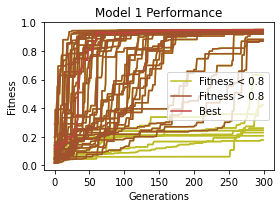

In [1]:
##################################################
# figure 2
# gens vs fitnness for multifunctional runs
##################################################
import os
import glob

import numpy as np
import matplotlib.pyplot as plt


def fitness_traces(dir):
    plt.figure(figsize=[4, 3])

    # load data
    files = glob.glob(os.path.join(dir, "best_history*.npy"))
    files.sort()
    print("Found {} files in {}".format(len(files), dir))
    best_final_fits = np.zeros(len(files))
    bfs = []
    for i, file in enumerate(files):
        fits = np.load(file)
        #print(fits)
        #print(fits.shape)
        #print(len(fits))
        #fits = fits**(1/4) #elevate for the number of tasks
        #fits = fits[0:1000]
       
        #print(fits)
        bfs.append(fits)
        best_final_fits[i] = fits[-1]
        #print(file, fits[-1])
    print(
        "Number of runs with fitness >= 0.8 = ",
        len(best_final_fits[best_final_fits > 0.8]),
    )

    # get best run from data
    #print(len(bfs))
    bfs = np.array(bfs)
    #print(bfs.shape)
    #print(bfs)
    best_run = np.argmax(bfs[:, -1])
    print(best_run, bfs[best_run, -1])

    # plot
    #ok_label = r"$Fitness \geq 0.9$"
    ok_label = "Fitness > 0.8"
    ko_label = "Fitness < 0.8"
    best_label = "Best"
    for i in range(np.shape(bfs)[0]):
        if bfs[i][-1] >= 0.0:
            plt.plot(bfs[i], "tab:olive", label=ko_label)
            plt.plot(bfs[i], "tab:olive")
            ko_label = None
    for i in range(np.shape(bfs)[0]):
        if bfs[i][-1] >= 0.85:
            plt.plot(bfs[i], "sienna", label=ok_label)
            #plt.plot(bfs[i], "tab:sienna")
            ok_label = None

    # Plotting best
    plt.plot(bfs[best_run], "xkcd:reddish", label=best_label)  # "xkcd:ultramarine")
    plt.title("Model 1 Performance")
    plt.legend()
    plt.xlabel("Generations")
    plt.yticks(np.arange(0.0, 1.1, step=0.2))
    plt.ylabel("Fitness")
    plt.tight_layout()
    plt.savefig("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Figures/fitness_traces_Model1.png")
    plt.show()


fitness_traces("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1")

Found 50 files in /Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1
0.836 0 all good prods
0 /Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1/perf_0.npy [0.836 1.   ] 0.836 network 13
0.9534 13 all good prods
13 /Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1/perf_20.npy [0.9534 1.    ] 0.9534 network 13
0.93414258 15 all good prods
15 /Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1/perf_22.npy [0.9378 0.9961] 0.93414258 network 13
0.9471 17 all good prods
17 /Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1/perf_24.npy [0.9471 1.    ] 0.9471 network 13
0.921967 22 all good prods
22 /Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1/perf_29.npy [0.9266 0.995 ] 0.921967 network 13
0.82337924 28 all good prods
28 /Users/lvbenson/Research_Projects/Neural_Reuse_New/Co

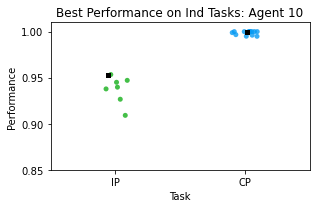

In [5]:
##################################################
# figure 3
# connected swarm of individual fitness of multifunc ensemble
##################################################
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


def connected_swarms(dir):
    plt.figure(figsize=[4.5, 3])

    # load data
    files = glob.glob(os.path.join(dir, "perf_*.npy"))
    files.sort()
    print("Found {} files in {}".format(len(files), dir))
    dat = []
    all_fits = []
    best_fits = []
    count = 0
    for i, file in enumerate(files):
        fits = np.load(file)
        fits = [fits[0],fits[1]]
        #fits = fits**(1/4)
        # if np.prod(fits) > 0.8:
        #prod_list = []
        if np.prod(fits) >= 0.8:
            count += 1
            fits = np.round(fits, decimals=4)
            all_fits.append(fits)
            #prod_list.append(np.prod(fits))
            print(np.prod(fits),i,'all good prods')
            
            if "perf_20.npy" in file:
                best_fits.append(["IP", fits[0], i])
                best_fits.append(["CP", fits[1], i])
                #best_fits.append(["MC", fits[1], i])
                #best_fits.append(["LW", fits[2], i])
                #best_fits.append(["MC", fits[3], i])
            print(i, file, fits, np.prod(fits), 'network 13')
            dat.append(["IP", fits[0], i])
            dat.append(["CP", fits[1], i])
            #dat.append(["MC", fits[1], i])
            #dat.append(["LW", fits[2], i])
            #dat.append(["MC", fits[3], i])
    print("Number of networks under considertaion ", count)
    all_fits = np.array(all_fits)
    #print(np.shape(all_fits), np.min(all_fits,0), np.argmin(all_fits, 0), np.max(all_fits, 0), np.max(np.prod(all_fits,1)))
    #print(best_fits)

    # make DataFrame and plot
    df = pd.DataFrame(dat, columns=["Task", "Performance", "network_id"])
    ax = sns.stripplot(
        x="Task",
        y="Performance",
        # hue="network_id",
        data=df,
        alpha=0.8,
        palette={"CP": "xkcd:azure", "IP": "xkcd:green"},
    )
    # ax.legend_.remove()

    # make DataFram and plot best
    df = pd.DataFrame(best_fits, columns=["Task", "Performance", "network_id"])
    #print(df)
    ax = sns.stripplot(
        x="Task",
        y="Performance",
        data=df,
        # palette={"IP": "xkcd:tomato", "CP": "xkcd:azure", "LW": "xkcd:teal green"},
        palette={"IP": "k", "CP": "k"},
        marker="s",
    )
    # ax.set_yticks(ax.get_yticks()[::5])

    """
    # plot connecting lines
    x1, y1 = np.array(ax.collections[0].get_offsets()).T
    x2, y2 = np.array(ax.collections[1].get_offsets()).T
    x3, y3 = np.array(ax.collections[2].get_offsets()).T
    for xi, xj, xk, yi, yj, yk in zip(x1, x2, x3, y1, y2, y3):
        if yi == np.max(y1):  # best of the best
            print("Max == ", yi, yi * yj * yk)
            plt.plot([xi, xj], [yi, yj], "black")
            plt.plot([xj, xk], [yj, yk], "black")
        else:
            plt.plot([xi, xj], [yi, yj], "gray", alpha=0.3)
            plt.plot([xj, xk], [yj, yk], "gray", alpha=0.3)
    """

    plt.ylim([0.85, 1.01])
    plt.yticks(np.arange(0.85, 1.01, 0.05))
    plt.title('Best Performance on Ind Tasks: Agent 10')
    plt.tight_layout()
    plt.savefig("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Figures/behavior_swarms_Model1.png")
    plt.show()


connected_swarms("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1")

In [7]:
##################################################
# figure 4
# perf-map and behavior trials of the best
##################################################
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

#print(0.6561**(1/4))
def behavior_viz(dir, run_num):
    plt.figure(figsize=[8.7, 4.2])

    ## Perf maps
    
    plt.subplot(221)
    perfmap_file = os.path.join(dir, "perfmap_IP_{}.npy".format(run_num))
    perfmap = np.load(perfmap_file)
    #perfmap = perfmap**(1/4)
    #print(perfmap)
    plt.imshow(perfmap, vmin=0.8, vmax=1)
    plt.xticks([0, 2, 4], [-3.14, 0, 3.14])
    plt.yticks([0, 2, 4], [1, 0, -1])
    # plt.colorbar()
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$\omega$")
    plt.title("IP \n fitness = {}".format(np.round(np.mean(perfmap), decimals=3)))
    

    plt.subplot(222)
    perfmap_file = os.path.join(dir, "perfmap_CP_{}.npy".format(run_num))
    perfmap = np.load(perfmap_file)
    perfmap = perfmap**(1/4)
    plt.imshow(perfmap, vmin=0.8, vmax=1)
    plt.xticks([0, 2, 4], [-0.05, 0, 0.05])
    plt.yticks([0, 2, 4], [0.05, 0, -0.05])
    # plt.colorbar()
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$\omega$")
    plt.title("CP \n fitness = {}".format(np.round(np.mean(perfmap), decimals=3)))

    """
    plt.subplot(243)
    perfmap_file = os.path.join(dir, "perfmap_LW_{}.npy".format(run_num))
    perfmap = np.load(perfmap_file)
    perfmap = perfmap**(1/4)
    #print(perfmap)
    plt.imshow(perfmap, vmin=0.8, vmax=1)
    plt.xticks([0, 2, 2], [-0.5, 0, 0.5])
    plt.yticks([0, 2, 2], [1, 0, -1])
    #plt.colorbar()
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$\omega$")
    plt.title("LW \n fitness = {}".format(np.round(np.mean(perfmap), decimals=3)))
    
    
    plt.subplot(222)
    perfmap_file = os.path.join(dir, "perfmap_MC_{}.npy".format(run_num))
    perfmap = np.load(perfmap_file)
    perfmap = perfmap**(1/4)
    #print(perfmap)
    plt.imshow(perfmap, vmin=0.8, vmax=1)
    plt.xticks([0, 2, 2], [-0.5, 0, 0.5],visible=False)
    plt.yticks([0, 2, 2], [1, 0, -1],visible=False)
    plt.colorbar()
    plt.xlabel("position")
    plt.ylabel("velocity")
    plt.title("MC \n fitness = {}".format(np.round(np.mean(perfmap), decimals=3)))
    """
    
    plt.tight_layout()
    
    


    ## Behaviors
    
    plt.subplot(223)
    IP_dat = np.load(os.path.join(dir, "theta_traces_IP_{}.npy".format(run_num)))[::15]
    for theta_trace in IP_dat:
        plt.plot(theta_trace)
        #plt.plot(np.arange(0, 15, 0.05), theta_trace)
    plt.yticks(np.arange(-360, 361, 180))
    plt.box(None)
    plt.ylabel(r"$\theta$")
    plt.xlabel("Time")
    del IP_dat
    
    plt.subplot(224)
    CP_dat = np.load(os.path.join(dir, "theta_traces_CP_{}.npy".format(run_num)))#[::15]
    for theta_trace in CP_dat:
        plt.plot(theta_trace)
    plt.yticks(np.arange(-360,361,180))
    plt.box(None)
    plt.ylabel(r"$\theta$")
    plt.xlabel("Time")
    del CP_dat
    """

    plt.subplot(247)
    LW_dat = np.load(os.path.join(dir, "theta_traces_LW_{}.npy".format(run_num)))
    for theta_trace in LW_dat:
        plt.plot(theta_trace)
    # plt.yticks(np.arange(-360,361,180))
    plt.box(None)
    plt.ylabel(r"$\theta$")
    plt.xlabel("Time")
    del LW_dat
    
    plt.subplot(224)
    MC_dat = np.load(os.path.join(dir, "position_traces_MC_{}.npy".format(run_num)))
    for position_trace in MC_dat:
        plt.plot(position_trace)
    plt.box(None)
    plt.ylabel("position")
    plt.xlabel("time")
    del MC_dat
    """
    

    plt.tight_layout()
    """
    np.save(
        os.path.join(save_dir, "position_traces_MC_{}.npy".format(run_num)),
        position_traces_MC,
    )
    """
    #plt.savefig(
    #    os.path.join(dir, "figure_4_behav_{}.pdf".format(run_num))
    #)
    plt.savefig("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Figures/MODEL1_behav_traces_20.png")
    plt.show()


behavior_viz("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data_M1", 20)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Cog_Models_Project/Data/perfmap_IP_20.npy'